In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

In [2]:
#lectura del Dataset con Pandas
diabetes_dataset_csv = pd.read_csv("diabetes.csv")
raisin_dataset_csv = pd.read_csv("Raisin_Dataset.csv") 

In [3]:
raisin_dataset_csv.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
#Aplicando filtros
Kecimen = raisin_dataset_csv[raisin_dataset_csv['Class']=='Kecimen']
Besni = raisin_dataset_csv[raisin_dataset_csv['Class']=='Besni']
Kecimen, Besni

(      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
 0    87524       442.246011       253.291155      0.819738       90546   
 1    75166       406.690687       243.032436      0.801805       78789   
 2    90856       442.267048       266.328318      0.798354       93717   
 3    45928       286.540559       208.760042      0.684989       47336   
 4    79408       352.190770       290.827533      0.564011       81463   
 ..     ...              ...              ...           ...         ...   
 445  61200       323.174410       246.288324      0.647470       64553   
 446  87089       396.486857       280.245450      0.707392       88754   
 447  59589       383.571233       201.381855      0.851091       62974   
 448  50312       354.235551       182.312081      0.857392       52070   
 449  41995       259.208878       210.350798      0.584337       43443   
 
        Extent  Perimeter    Class  
 0    0.758651   1184.040  Kecimen  
 1    0.684130   1121.78

In [5]:
yy = raisin_dataset_csv['Class']
xx = raisin_dataset_csv[['Area','Perimeter','MajorAxisLength','Eccentricity','ConvexArea','Extent']]

In [6]:
#normalizacion de los datos
#datos = raisin_dataset_csv[['Area','Perimeter','MajorAxisLength','Eccentricity','ConvexArea','Extent']]
datos = raisin_dataset_csv[['Area','Perimeter']]
clase = raisin_dataset_csv['Class']
escalador = preprocessing.MinMaxScaler()
datos = escalador.fit_transform(datos)
datos

array([[0.29637031, 0.27179088],
       [0.23742726, 0.24184205],
       [0.31226271, 0.28359405],
       ...,
       [0.3542402 , 0.32412604],
       [0.32498331, 0.3076348 ],
       [0.28723648, 0.3145209 ]])

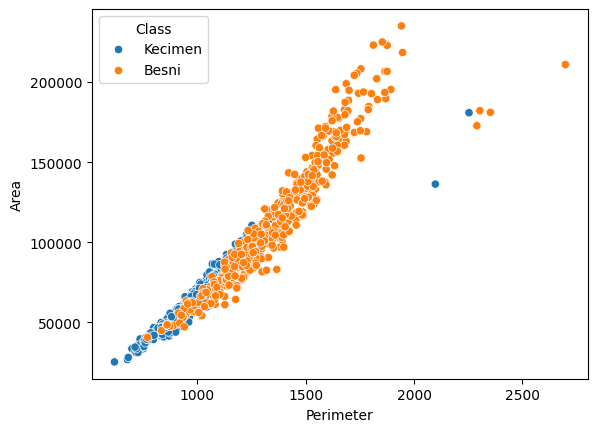

In [7]:
fig2 = sns.scatterplot(data=raisin_dataset_csv,x='Perimeter',y='Area',hue='Class')

In [8]:
xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.2, random_state=42, stratify=yy)

In [10]:
scores_R = []
ks = range(1,25)
for k in ks:
    knn_R = KNeighborsClassifier(n_neighbors=k)
    scores_R.append(np.mean(cross_val_score(knn_R,xx_train,yy_train,cv=5)))

In [17]:
best_k = ks[np.argmax(scores_R)]
knn_R = KNeighborsClassifier(n_neighbors=1)
knn_R.fit(xx_train, yy_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
predictions_R = knn_R.predict(xx_test)
list(zip(predictions_R,yy_test))

[('Besni', 'Besni'),
 ('Besni', 'Besni'),
 ('Besni', 'Besni'),
 ('Kecimen', 'Kecimen'),
 ('Kecimen', 'Besni'),
 ('Kecimen', 'Kecimen'),
 ('Besni', 'Besni'),
 ('Kecimen', 'Kecimen'),
 ('Kecimen', 'Kecimen'),
 ('Kecimen', 'Kecimen'),
 ('Kecimen', 'Kecimen'),
 ('Kecimen', 'Kecimen'),
 ('Kecimen', 'Kecimen'),
 ('Kecimen', 'Besni'),
 ('Besni', 'Besni'),
 ('Kecimen', 'Kecimen'),
 ('Kecimen', 'Kecimen'),
 ('Besni', 'Besni'),
 ('Besni', 'Besni'),
 ('Besni', 'Besni'),
 ('Besni', 'Kecimen'),
 ('Kecimen', 'Besni'),
 ('Kecimen', 'Kecimen'),
 ('Kecimen', 'Kecimen'),
 ('Kecimen', 'Kecimen'),
 ('Besni', 'Kecimen'),
 ('Kecimen', 'Kecimen'),
 ('Kecimen', 'Kecimen'),
 ('Kecimen', 'Kecimen'),
 ('Besni', 'Kecimen'),
 ('Kecimen', 'Kecimen'),
 ('Kecimen', 'Kecimen'),
 ('Besni', 'Besni'),
 ('Kecimen', 'Besni'),
 ('Kecimen', 'Besni'),
 ('Besni', 'Kecimen'),
 ('Kecimen', 'Kecimen'),
 ('Besni', 'Besni'),
 ('Besni', 'Besni'),
 ('Besni', 'Besni'),
 ('Besni', 'Besni'),
 ('Besni', 'Besni'),
 ('Besni', 'Besni'),
 ('

In [20]:
test_accuaracy = knn_R.score(xx_test, yy_test)
print("Test Accuary: {:.2f}".format(test_accuaracy))
print(classification_report(yy_test,predictions_R))
precision = precision_score(yy_test, predictions_R, average=None)
recall = recall_score(yy_test, predictions_R, average=None) 
f1 = f1_score(yy_test, predictions_R, average=None)
print (precision)
print (recall)
print (f1)


Test Accuary: 0.77
              precision    recall  f1-score   support

       Besni       0.82      0.70      0.75        90
     Kecimen       0.74      0.84      0.79        90

    accuracy                           0.77       180
   macro avg       0.78      0.77      0.77       180
weighted avg       0.78      0.77      0.77       180

[0.81818182 0.73786408]
[0.7        0.84444444]
[0.75449102 0.78756477]


In [21]:
# Diccionario para almacenar los resultados
results = {'K': [], 'Accuracy': [], 'Precision Besni': [], 'Precision Kecimen': [], 'Recall Besni': [], 'Recall Kecimen': [], 'F1-score Besni': [], 'F1-score Kecimen': []}
scores_R = []
ks = range(1,20)
print (ks)
for k in ks:
    
    knn_R = KNeighborsClassifier(k)
    knn_R.fit(xx_train, yy_train)
    
    # Realizar predicciones en los datos de prueba
    y_pred = knn_R.predict(xx_test)
    
    # Calcular métricas
    accuracy = accuracy_score(yy_test, y_pred)
    precision = precision_score(yy_test, y_pred, average=None )
    recall = recall_score(yy_test, predictions_R, average=None)
    f1 = f1_score(yy_test, predictions_R, average=None) 
    # Almacenar los resultados en el diccionario
    results['K'].append(k)
    results['Accuracy'].append(accuracy)
    results['Precision Besni'].append(precision[0])
    results['Precision Kecimen'].append(precision[1])
    results['Recall Besni'].append(recall[0])
    results['Recall Kecimen'].append(recall[1])
    results['F1-score Besni'].append(f1[0])
    results['F1-score Kecimen'].append(f1[1])
    results_df = pd.DataFrame(results)
    
print("Tabla de resultados:")
print(results_df)

range(1, 20)
Tabla de resultados:
     K  Accuracy  Precision Besni  Precision Kecimen  Recall Besni  \
0    1  0.772222         0.818182           0.737864           0.7   
1    2  0.761111         0.742268           0.783133           0.7   
2    3  0.800000         0.846154           0.764706           0.7   
3    4  0.805556         0.816092           0.795699           0.7   
4    5  0.816667         0.870130           0.776699           0.7   
5    6  0.844444         0.878049           0.816327           0.7   
6    7  0.816667         0.890411           0.766355           0.7   
7    8  0.822222         0.871795           0.784314           0.7   
8    9  0.811111         0.900000           0.754545           0.7   
9   10  0.822222         0.891892           0.773585           0.7   
10  11  0.822222         0.926471           0.758929           0.7   
11  12  0.816667         0.901408           0.761468           0.7   
12  13  0.811111         0.900000           0.754545    

In [22]:
#diabetes
diabetes_dataset_csv.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
y = diabetes_dataset_csv['Outcome']
x = diabetes_dataset_csv [['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']]

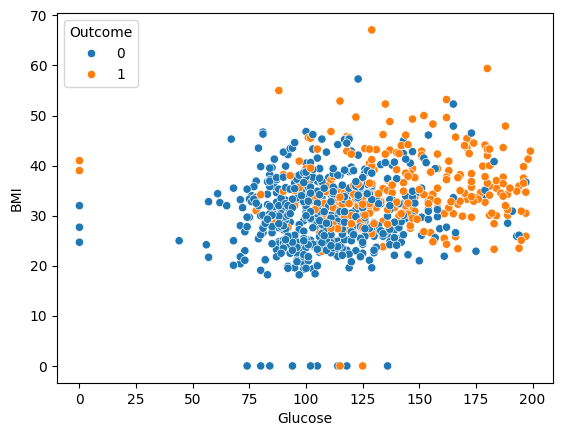

In [11]:
fig = sns.scatterplot(data=diabetes_dataset_csv,x='Glucose',y='BMI',hue='Outcome')
#es facil ver segun aumenta la glucosa y el indice de masa corporal es mas posible que tenga Diabetes una persona

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [25]:
scores = []
ks = range(1,25)
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn,x_train,y_train,cv=5)))

In [26]:
best_k = ks[np.argmax(scores)]
knn = KNeighborsClassifier(n_neighbors=20)
print(best_k)
knn.fit(x_train, y_train)

12


KNeighborsClassifier(n_neighbors=20)

In [27]:
predictions = knn.predict(x_test)
list(zip(predictions,y_test))

[(1, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (0, 1),
 (0, 1),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (1, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 

In [28]:
test_accuaracy = knn.score(x_test, y_test)
print("Test Accuary: {:.2f}".format(test_accuaracy))
print(classification_report(y_test,predictions))

Test Accuary: 0.71
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       100
           1       0.62      0.46      0.53        54

    accuracy                           0.71       154
   macro avg       0.69      0.66      0.66       154
weighted avg       0.70      0.71      0.70       154



In [29]:
# Diccionario para almacenar los resultados
results = {'K': [], 'Accuracy': [], 'Precision 0': [], 'Precision 1': [], 'Recall 0': [], 'Recall 1': [], 'F1-score 0': [], 'F1-score 1': []}
ks = range(1,20)
print (ks)
for k in ks:
    
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    
    # Realizar predicciones en los datos de prueba
    y_pred = knn.predict(x_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=None )
    recall = recall_score(y_test, predictions, average=None)
    f1 = f1_score(y_test, predictions, average=None) 
    # Almacenar los resultados en el diccionario
    results['K'].append(k)
    results['Accuracy'].append(accuracy)
    results['Precision 0'].append(precision[0])
    results['Precision 1'].append(precision[1])
    results['Recall 0'].append(recall[0])
    results['Recall 1'].append(recall[1])
    results['F1-score 0'].append(f1[0])
    results['F1-score 1'].append(f1[1])
    results_df = pd.DataFrame(results)
    
print("Tabla de resultados:")
print(results_df)

range(1, 20)
Tabla de resultados:
     K  Accuracy  Precision 0  Precision 1  Recall 0  Recall 1  F1-score 0  \
0    1  0.662338     0.744898     0.517857      0.85  0.462963    0.794393   
1    2  0.714286     0.725806     0.666667      0.85  0.462963    0.794393   
2    3  0.694805     0.747664     0.574468      0.85  0.462963    0.794393   
3    4  0.727273     0.737705     0.687500      0.85  0.462963    0.794393   
4    5  0.662338     0.730769     0.520000      0.85  0.462963    0.794393   
5    6  0.714286     0.737288     0.638889      0.85  0.462963    0.794393   
6    7  0.675325     0.735849     0.541667      0.85  0.462963    0.794393   
7    8  0.707792     0.735043     0.621622      0.85  0.462963    0.794393   
8    9  0.688312     0.745283     0.562500      0.85  0.462963    0.794393   
9   10  0.681818     0.729730     0.558140      0.85  0.462963    0.794393   
10  11  0.675325     0.740385     0.540000      0.85  0.462963    0.794393   
11  12  0.701299     0.736842 